<font size= 3, style="text-align:justify">

Zain Elsell & Avery Fulton\
March 17, 2023\
Applied Regression 

<p style="text-align: center;">Fraud Detection Paper 1</p>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As stated in our project proposal our goal is to try to create a logistic regression fraud detection algorithm from the IEEE fraud-detection data set located on Kagel. The primary objectives of this paper are to analyze the response variable in both problem and mathematical contexts, evaluate potential predictor variables, identify and address inconsistencies or outliers, establish confidence intervals for some predictor variables, and determine high correlation coefficients between them.    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; That being said, our response variable is the binary predictor "isFraud". We can begin this project by first importing the required dependencies that we are going through and then performing some, rudimentary data wrangling. Initially, what we are doing is importing the data for the train and test sets that were given to us then merging the identity data with the transaction data for both our train and test sets on the TransactionID column so we can use only two .csv documents as opposed to the given four. The next step in the wrangling process is taking a consistent sample of 10% of the given data; the primary motivation behind this choice was to reduce the compute time for a select few and manipulations operations, as the initial data set contains 590,540 data points and 434 possible features. Note that we will run the created model on the overall data set to consistently represent the performance in the context of a larger sample. 
    

    
 </font>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci
from sys import platform

In [7]:
#importing data
if platform == "win32":
    data_path = 'C:/Users/zaine/OneDrive/Desktop/School/STAT/Reg_Proj/ieee-fraud-detection/'
elif platform == "darwin":
    data_path = "~/Desktop/School/Reg_Proj/ieee-fraud-detection/"


train_ident = pd.read_csv(data_path + 'train_identity.csv')
test_ident = pd.read_csv(data_path + 'test_identity.csv')
train_transaction = pd.read_csv(data_path + 'train_transaction.csv')
test_transaction = pd.read_csv(data_path + 'test_transaction.csv')

#Merging our 4 data sets into 2:
train = train_transaction.merge(train_ident, on='TransactionID', how='left')
test = test_transaction.merge(test_ident, on='TransactionID', how='left')
# Sampling 10% of the data to run our analysis on 
#Seed of sample is 120  we should use theat for the rest  of the proj
train_sample = train.sample(frac = 0.1, random_state = 120)
test_sample = test.sample(frac = 0.1, random_state=120)

0.034967995394046124
0.03499000914417313


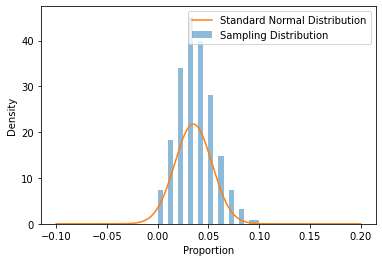

In [9]:
#calculating the proportion of transactions that are fraud for our smaller data set:
propFraud10 = train_sample['isFraud'].mean()
print(propFraud10)


#for the larger data set
propFraud = train['isFraud'].mean()
print(propFraud)

#constructing a sampling distribution.
p = propFraud
n = 100 
#gen 1k samples of size n
samples = np.random.binomial(n,p, 1000)
sample_props = samples/n

plt.hist(sample_props, bins=20, density=True, alpha=0.5, label='Sampling Distribution')
mu = np.mean(sample_props)
sigma = np.std(sample_props)

x = np.linspace(-0.1, 0.2, 1000)
norm = sci.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, norm, label='Normal Distribution')

plt.xlabel('Proportion')
plt.ylabel('Density')
plt.legend()

plt.show()

<font size= 3, style="text-align:justify">
     
$$\text{Let } F := \text{the probability that a transaction is fraudelent}$$

$$\text{Let }F':= \text{the probability that a transaction is fraudelent when sampling 10 \% of the data}$$ 

$$F \sim\text{Binomial(3.499\%)}$$

$$F'\sim\text{Binomial(3.483\%)}$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Generally we can say our response variable is distributed as binomial with a $p \approx 3.5$, and some of the clear implications of finding is that likelyhood of fraud is not common outcome of a transaction. Reflecting from the the finicial sector context this is plausible the overall proporition of fraudelent transactions, is signicantly lower then the proporition authorized ones. 
 
 </font>

In [ ]:
train_corr = train_sample.corr()

In [ ]:
# Extract the correlations as a DataFrame
abscorr = train_corr.abs()
# Filter the DataFrame to show only correlations greater than 0.7 and not equal to 1
high_corr = abscorr[(abscorr > 0.7) & (abscorr != 1)]
# Print the high correlation pairs
high_corr_dict = (high_corr.stack().drop_duplicates()).to_dict()
#high_corr_dict.keys()
corrs = {k:v for k, v in high_corr_dict.items() if 'C1' in k}
corrs

{('C1', 'C2'): 0.9960255814335263,
 ('C1', 'C4'): 0.9720331304828849,
 ('C1', 'C6'): 0.9837587217717109,
 ('C1', 'C7'): 0.9379304598092051,
 ('C1', 'C8'): 0.9726319845008362,
 ('C1', 'C10'): 0.9649521721724863,
 ('C1', 'C11'): 0.9970126813477574,
 ('C1', 'C12'): 0.9393597650111772,
 ('C1', 'C13'): 0.7926063809278694,
 ('C1', 'C14'): 0.9559284351187977}

0.034967995394046124
0.03499000914417313


In [ ]:
len(column_names)

434